In [9]:

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [36]:
df=pd.read_excel('./data/Admissiondata.xlsx')

In [37]:
df.describe()

,Hospital Stay,Gross Bill Amount,Authorisation Amount,Insurance Payable,Cash Payable,Shortfall Payable,Special Contract Payable,Total Cash/Shortfall Payable,Total Cash/Shortfall Paid,Total Amount Payable,Total Amount Paid,Age
count,13961.000000,1.510700e+04,1.510700e+04,1.510700e+04,15107.000000,15107.000000,15107.000000,15107.000000,15107.000000,1.510700e+04,15107.000000,15107.000000
mean,3.977222,2.624087e+04,2.277017e+04,2.314707e+04,1619.103508,1067.006470,407.691032,2686.109977,953.050861,2.624087e+04,953.050861,42.148143
std,13.377516,7.532498e+04,7.124035e+04,7.166542e+04,13612.136299,15858.162621,14073.434550,20816.247495,7569.267765,7.532498e+04,7569.267765,23.752562
min,-723.000000,-1.938000e+01,0.000000e+00,0.000000e+00,0.000000,-1363.360000,0.000000,-1363.360000,0.000000,-1.938000e+01,0.000000,0.000000
25%,1.000000,6.666800e+02,4.000000e+02,4.219400e+02,0.000000,0.000000,0.000000,0.000000,0.000000,6.666800e+02,0.000000,27.000000
50%,2.000000,2.626260e+03,1.528000e+03,1.571910e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.626260e+03,0.000000,39.000000
75%,5.000000,2.302181e+04,1.783888e+04,1.877026e+04,0.000000,0.000000,0.000000,0.000000,0.000000,2.302181e+04,0.000000,61.000000
max,423.000000,1.964434e+06,1.964434e+06,1.964434e+06,529143.060000,803171.560000,815074.210000,803171.560000,304255.000000,1.964434e+06,304255.000000,133.000000


In [38]:
df.tail()

,Patient Number,Visit Number,Diagnosis,ICD10 code,Admission Status,Addmission Date Time,Discharge Date Time,Hospital Stay,Stay,Ward,...,Total Amount Paid,Addmission Date,Addmission Time,Discharge Date,Discharge Time,ICD10 code.1,diagnosis name,name,date_of_birth,Age
15102,PAT1812N023023,H01VST1909N000339,Factors influencing health status and contact ...,Z97.5,DISCHARGE,2019-09-24 14:06:27.0000000,2019-09-28 17:20:00.000,0.0,Days,MATERNITY,...,0.0,2019-09-28,14:06:27,2019-09-28,17:20:00,Z97.5,Presence of (intrauterine) contraceptive device,FEMALE,1984-03-06,37
15103,PAT1810N040219,H01VST2109N000106,Factors influencing health status and contact ...,Z98,DISCHARGE,2021-09-07 11:02:55.0000000,2021-09-09 14:00:00.000,2.0,Days,MATERNITY,...,0.0,2021-09-07,11:02:55,2021-09-09,14:00:00,Z98,Other postsurgical states,FEMALE,1983-12-01,38
15104,PAT1809N010478,H01VST2109N000202,Factors influencing health status and contact ...,Z98.0,DISCHARGE,2021-09-13 13:20:07.0000000,2021-09-14 13:00:27.000,1.0,Days,SURGICAL,...,0.0,2021-09-13,13:20:07,2021-09-14,13:00:27,Z98.0,Intestinal bypass and anastomosis status,MALE,1969-03-04,52
15105,PAT180823N000900,H01VST1910N000097,Factors influencing health status and contact ...,Z98.8,DISCHARGE,2019-10-04 07:31:29.0000000,2019-10-04 13:00:40.000,0.0,Days,SURGICAL,...,0.0,2019-10-04,07:31:29,2019-10-04,13:00:40,Z98.8,Other specified postprocedural states,MALE,1956-08-20,65
15106,PAT1906N012613,H01VST2109N000526,Factors influencing health status and contact ...,Z99.2,DISCHARGE,2021-09-29 21:42:21.0000000,2021-10-02 09:00:43.000,3.0,Days,MEDICAL,...,0.0,2021-09-29,21:42:21,2021-10-02,09:00:43,Z99.2,Dependence on renal dialysis,MALE,1942-12-23,79


In [39]:
df.columns

Index(['Patient Number', 'Visit Number', 'Diagnosis', 'ICD10 code',
       'Admission Status', 'Addmission Date Time', 'Discharge Date Time',
       'Hospital Stay', 'Stay', 'Ward', 'Bill Type', 'Bill Category',
       'Insurance', 'Admission Doctor', 'Visit created by', 'Discharge Doctor',
       'Gross Bill Amount', 'Authorizaion Number', 'Authorisation Amount',
       'Insurance Payable', 'Cash Payable', 'Shortfall Payable',
       'Special Contract Payable', 'Total Cash/Shortfall Payable',
       'Total Cash/Shortfall Paid', 'Total Amount Payable',
       'Total Amount Paid', 'Addmission Date', 'Addmission Time',
       'Discharge Date', 'Discharge Time', 'ICD10 code.1', 'diagnosis name',
       'name', 'date_of_birth', 'Age'],
      dtype='object')

In [19]:
df['Hospital Stay'].describe()

count    13961.000000
mean         3.977222
std         13.377516
min       -723.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        423.000000
Name: Hospital Stay, dtype: float64

In [20]:
# removing negative HAD
df[df['Hospital Stay']<0]

,Patient Number,Visit Number,Bill Number,Admission Status,Addmission Date Time,Discharge Date Time,Hospital Stay,Stay,Ward,Bill Type,...,Total Amount Paid,Addmission Date,Addmission Time,Discharge Date,Discharge Time,ICD10 code,diagnosis name,name,date_of_birth,Age
524,PAT2102N001585,H03VST2102N000029,H03BIL2102000029,DISCHARGE,2021-02-23 15:26:12.0000000,2021-02-19 10:00:59.000,-4.0,Days,MEDICAL,INPATIENT,...,0.00,2021-02-23,15:26:12,2021-02-19,10:00:59,I50.0,Congestive heart failure,FEMALE,1937-06-05,84
527,PAT1811N026482,H03VST2102N000023,H03BIL2102000023,DISCHARGE,2021-02-23 14:59:43.0000000,2021-02-20 10:00:59.000,-3.0,Days,MEDICAL,INPATIENT,...,0.00,2021-02-23,14:59:43,2021-02-20,10:00:59,E04,Other nontoxic goitre,MALE,1949-12-25,72
528,PAT2102N007052,H03VST2102N000021,H03BIL2102000021,DISCHARGE,2021-02-23 14:51:18.0000000,2021-02-19 10:00:59.000,-4.0,Days,MEDICAL,INPATIENT,...,10888.80,2021-02-23,14:51:18,2021-02-19,10:00:59,I50.0,Congestive heart failure,MALE,1959-10-23,62
783,PAT180822N000143,H03VST2009N000033,H03BIL2009000034,DISCHARGE,2020-09-29 16:53:19.0000000,2020-09-28 10:00:59.000,-1.0,Days,MEDICAL,INPATIENT,...,0.00,2020-09-29,16:53:19,2020-09-28,10:00:59,NaN,NaN,MALE,1953-06-30,68
854,PAT2007N005933,H03VST2007N000029,H03BIL2007000031,DISCHARGE,2020-07-28 14:19:37.0000000,2020-07-01 16:00:57.000,-27.0,Days,MEDICAL,INPATIENT,...,14022.36,2020-07-28,14:19:37,2020-07-01,16:00:57,D64,Other anaemias,FEMALE,1954-04-09,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12520,PAT1908N005956,H05VST1908N000227,H05BIL1908000529,DISCHARGE,2019-08-14 03:47:35.0000000,2017-09-01 13:00:42.000,-712.0,Days,MATERNITY,INPATIENT,...,0.00,2019-08-14,03:47:35,2017-09-01,13:00:42,O80.0,Spontaneous vertex delivery,FEMALE,1996-01-24,25
12668,PAT180727N001684,H05VST1908N000361,H05BIL1908000841,DISCHARGE,2019-08-21 14:15:41.0000000,2019-08-01 15:00:53.000,-20.0,Days,MEDICAL,INPATIENT,...,0.00,2019-08-21,14:15:41,2019-08-01,15:00:53,E16.2,"Hypoglycemia, unspecified",FEMALE,1967-04-20,54
12707,PAT1906N018042,H05VST1908N000391,H05BIL1908000911,DISCHARGE,2019-08-23 08:41:47.0000000,2019-06-01 16:00:02.000,-83.0,Days,MEDICAL,INPATIENT,...,0.00,2019-08-23,08:41:47,2019-06-01,16:00:02,A08.1,Acute gastroenteropathy due to Norwalk agent,FEMALE,1977-09-12,44
13788,PAT1812N002189,H05VST2108N000128,H05BIL2108000211,DISCHARGE,2021-08-12 09:40:57.0000000,2021-08-11 10:00:54.000,-1.0,Days,MEDICAL,INPATIENT,...,0.00,2021-08-12,09:40:57,2021-08-11,10:00:54,O36.0,Maternal care for rhesus isoimmunisation,FEMALE,1995-12-06,26


In [21]:
df['Hospital Stay'][df['Hospital Stay']>0].describe()

count    12305.000000
mean         4.742219
std          8.838689
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        423.000000
Name: Hospital Stay, dtype: float64

In [22]:
df=df[df['Hospital Stay']>0]

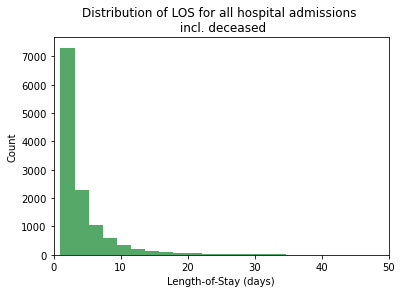

In [23]:
plt.hist(df['Hospital Stay'], bins=200, color = '#55a868')
plt.xlim(0, 50)
plt.title('Distribution of LOS for all hospital admissions \n incl. deceased')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.tick_params(top=False, right=False) 
plt.show();

In [24]:
df['Ward'].value_counts()

MEDICAL              5791
MATERNITY            2851
PAEDIATRIC           1330
GENERAL               865
SURGICAL              625
HDU                   419
NNU                   266
MEDICAL EXTENSION      83
ICU                    75
Name: Ward, dtype: int64

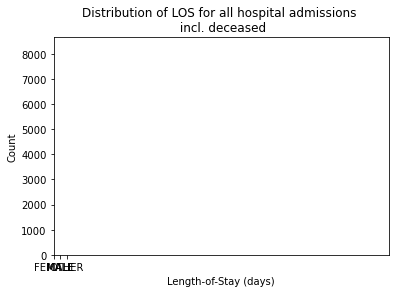

In [25]:
plt.hist(df['name'], bins=200, color = '#55a868')
plt.xlim(0, 50)
plt.title('Distribution of LOS for all hospital admissions \n incl. deceased')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.tick_params(top=False, right=False) 
plt.show();

In [26]:
df['Bill Category'].value_counts()

INSURANCE           11015
CASH                 1227
SPECIAL_CONTRACT       63
Name: Bill Category, dtype: int64

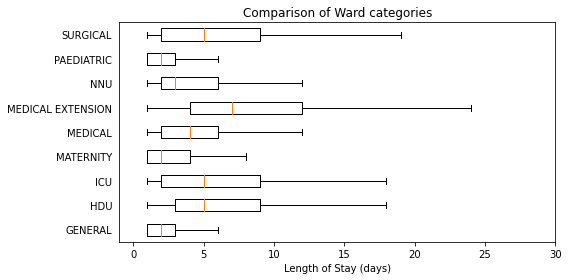

In [29]:
# Re-usable plotting function
def plot_los_groupby(variable, size=(7,4)):
    ''' 
    Plot Median LOS by df categorical series name 
    '''
    results = df[[variable, 'Hospital Stay']].groupby(variable).median().reset_index()
    values = list(results['Hospital Stay'].values)
    labels = list(results[variable].values)

    fig, ax = plt.subplots(figsize=size)
    ind = range(len(results))
    ax.barh(ind, values, align='center', height=0.6, color = '#55a868', alpha=0.8)
    ax.set_yticks(ind)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Median Length of Stay (days)')
    ax.tick_params(left=False, top=False, right=False) 
    ax.set_title('Comparison of {} labels'.format(variable))
    
    plt.tight_layout()
    plt.show();
    
# Re-usable boxplot function
def boxplot_los_groupby(variable, los_range=(-1, 30), size=(8,4)):
    ''' 
    Boxplot of LOS by df categorical series name 
    '''
    results = df[[variable, 'Hospital Stay']].groupby(variable).median().reset_index()

    categories = results[variable].values.tolist()

    hist_data = []
    for cat in categories:
        hist_data.append(df['Hospital Stay'].loc[df[variable]==cat].values)

    fig, ax = plt.subplots(figsize=size)
    ax.boxplot(hist_data, 0, '', vert=False)
    ax.set_xlim(los_range)
    ax.set_yticklabels(categories)
    ax.set_xlabel('Length of Stay (days)')
    ax.tick_params(left=False, right=False) 
    ax.set_title('Comparison of {} categories'.format(variable))
    plt.tight_layout()
    plt.show();

boxplot_los_groupby('Ward', los_range=(-1, 30))

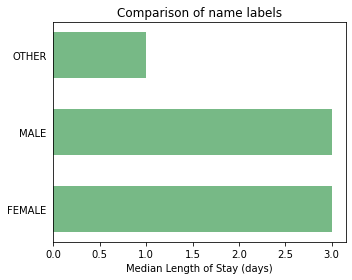

In [30]:
plot_los_groupby('name', size=(5,4))

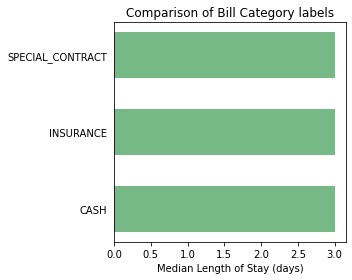

In [31]:
plot_los_groupby('Bill Category', size=(5,4))

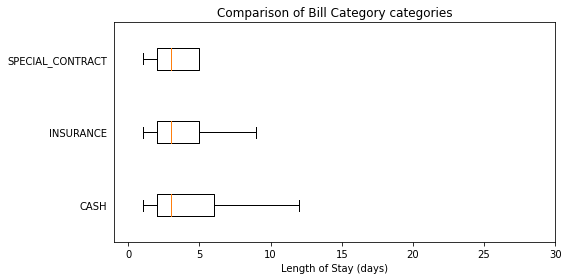

In [32]:
boxplot_los_groupby('Bill Category', los_range=(-1, 30))

#Diagnoses

ICD-10 chapters
Chapter	Block	Title
I	A00–B99	Certain infectious and parasitic diseases
II	C00–D48	Neoplasms
III	D50–D89	Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV	E00–E90	Endocrine, nutritional and metabolic diseases
V	F00–F99	Mental and behavioural disorders
VI	G00–G99	Diseases of the nervous system
VII	H00–H59	Diseases of the eye and adnexa
VIII	H60–H95	Diseases of the ear and mastoid process
IX	I00–I99	Diseases of the circulatory system
X	J00–J99	Diseases of the respiratory system
XI	K00–K93	Diseases of the digestive system
XII	L00–L99	Diseases of the skin and subcutaneous tissue
XIII	M00–M99	Diseases of the musculoskeletal system and connective tissue
XIV	N00–N99	Diseases of the genitourinary system
XV	O00–O99	Pregnancy, childbirth and the puerperium
XVI	P00–P96	Certain conditions originating in the perinatal period
XVII	Q00–Q99	Congenital malformations, deformations and chromosomal abnormalities
XVIII	R00–R99	Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX	S00–T98	Injury, poisoning and certain other consequences of external causes
XX	V01–Y98	External causes of morbidity and mortality
XXI	Z00–Z99	Factors influencing health status and contact with health services
XXII	U00–U99	Codes for special purposes


In [35]:
df['ICD10 code'].value_counts()

O80.0     1052
I10        633
E118       330
O82.1      273
O82.0      250
          ... 
K26.1        1
H10          1
M24.50       1
S20.2        1
F95.0        1
Name: ICD10 code, Length: 1590, dtype: int64

In [40]:
df['Diagnosis'].value_counts()

Pregnancy, childbirth and the puerperium                                3201
Diseases of the circulatory system                                      1700
Diseases of the respiratory system                                      1377
Diseases of the digestive system                                        1324
Endocrine, nutritional and metabolic diseases                           1051
Certain infectious and parasitic diseases                                899
abnormal clinical and laboratory findings                                818
Diseases of the genitourinary system                                     725
Injury, poisoning and certain other consequences of external causes      556
Diseases of the musculoskeletal system and connective tissue             532
Neoplasms                                                                519
Diseases of the blood and blood-forming organs                           422
Certain conditions originating in the perinatal period                   279

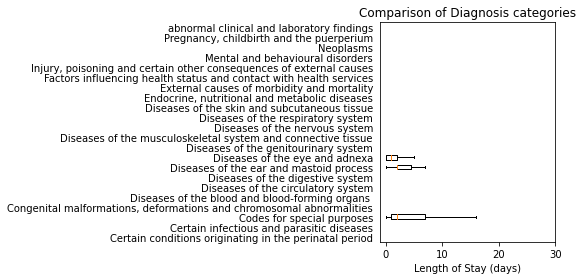

In [41]:
boxplot_los_groupby('Diagnosis', los_range=(-1, 30))

<ipython-input-29-7b4daca6235c>:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


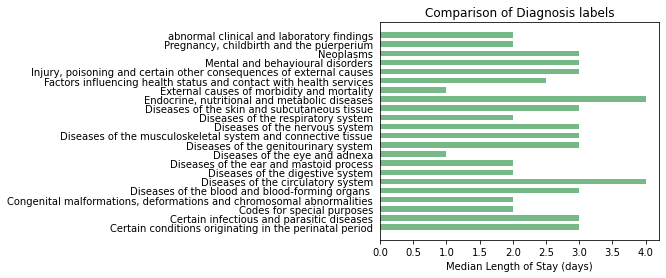

In [42]:
plot_los_groupby('Diagnosis', size=(5,4))

In [43]:
df['name'].value_counts()

FEMALE    9961
MALE      5145
OTHER        1
Name: name, dtype: int64

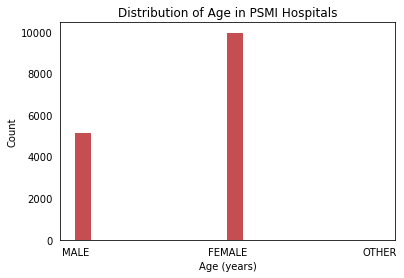

In [44]:
# Note that no ‘middle’ patients show up - this reflects the fact that MIMIC-III does not contain data from pediatric patients.
plt.hist(df['name'], bins=20, color='#c44e52')
plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.title('Distribution of Gender in PSMI Hospitals')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show();

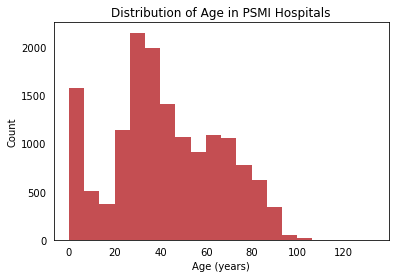

In [45]:
# Note that no ‘middle’ patients show up - this reflects the fact that MIMIC-III does not contain data from pediatric patients.
plt.hist(df['Age'], bins=20, color='#c44e52')
plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.title('Distribution of Age in PSMI Hospitals')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show();

(1.0, 50.0)

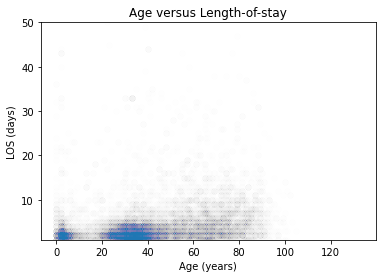

In [46]:
plt.scatter(df['Age'], df['Hospital Stay'], alpha=0.005)
#plt.yscale('sqrt')
plt.ylabel('LOS (days)')
plt.xlabel('Age (years)')
plt.title('Age versus Length-of-stay')
plt.ylim(1, 50)

### Data Preprocessing


In [47]:
df=df[df['Hospital Stay']>0]

In [49]:
df.columns

Index(['Patient Number', 'Visit Number', 'Diagnosis', 'ICD10 code',
       'Admission Status', 'Addmission Date Time', 'Discharge Date Time',
       'Hospital Stay', 'Stay', 'Ward', 'Bill Type', 'Bill Category',
       'Insurance', 'Admission Doctor', 'Visit created by', 'Discharge Doctor',
       'Gross Bill Amount', 'Authorizaion Number', 'Authorisation Amount',
       'Insurance Payable', 'Cash Payable', 'Shortfall Payable',
       'Special Contract Payable', 'Total Cash/Shortfall Payable',
       'Total Cash/Shortfall Paid', 'Total Amount Payable',
       'Total Amount Paid', 'Addmission Date', 'Addmission Time',
       'Discharge Date', 'Discharge Time', 'ICD10 code.1', 'diagnosis name',
       'name', 'date_of_birth', 'Age'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 15106
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Patient Number                12305 non-null  object        
 1   Visit Number                  12305 non-null  object        
 2   Diagnosis                     12054 non-null  object        
 3   ICD10 code                    12054 non-null  object        
 4   Admission Status              12305 non-null  object        
 5   Addmission Date Time          12305 non-null  object        
 6   Discharge Date Time           12305 non-null  object        
 7   Hospital Stay                 12305 non-null  float64       
 8   Stay                          12305 non-null  object        
 9   Ward                          12305 non-null  object        
 10  Bill Type                     12305 non-null  object        
 11  Bill Category               

In [71]:
newdf = df.drop(['Patient Number','Visit Number','Bill Type','Addmission Date Time',
                 'Discharge Date Time','Visit created by','Authorizaion Number','Authorisation Amount',
                 'Insurance Payable','Cash Payable','Shortfall Payable','Special Contract Payable',
                 'Total Cash/Shortfall Payable','Total Cash/Shortfall Paid',
                 'Total Amount Payable','Total Amount Paid','Addmission Date',
                 'Discharge Date','date_of_birth','Admission Status','ICD10 code','Stay','Insurance','Discharge Doctor','Gross Bill Amount','Addmission Time',
              'Discharge Time','ICD10 code.1','diagnosis name'], axis =1)

In [72]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 15106
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diagnosis         12054 non-null  object 
 1   Hospital Stay     12305 non-null  float64
 2   Ward              12305 non-null  object 
 3   Bill Category     12305 non-null  object 
 4   Admission Doctor  12304 non-null  object 
 5   name              12305 non-null  object 
 6   Age               12305 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 769.1+ KB


In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
le=LabelEncoder()
for cl in newdf.select_dtypes(include=['object']).columns:
    newdf[cl]=le.fit_transform(newdf[cl])

In [100]:
newdf.head()

,Patient Number,Visit Number,Diagnosis,ICD10 code,Admission Status,Addmission Date Time,Discharge Date Time,Hospital Stay,Stay,Ward,...,Total Amount Paid,Addmission Date,Addmission Time,Discharge Date,Discharge Time,ICD10 code.1,diagnosis name,name,date_of_birth,Age
0,PAT1909N007869,H03VST1909N000195,abnormal clinical and laboratory findings,2,DISCHARGE,2019-09-30 16:38:54.0000000,2019-10-07 10:00:00.000,7.0,Days,MEDICAL,...,0.0,2019-09-30,16:38:54,2019-10-07,10:00:00,2,"Gangrene, not elsewhere classified",MALE,1979-04-23,42
1,PAT1903N025021,H02VST1905N000036,abnormal clinical and laboratory findings,2,DISCHARGE,2019-05-06 12:58:48.0000000,2019-05-22 14:00:00.000,16.0,Days,MEDICAL,...,0.0,2019-05-06,12:58:48,2019-05-22,14:00:00,2,"Gangrene, not elsewhere classified",FEMALE,1938-06-14,83
2,PAT1903N025021,H02VST1905N000150,abnormal clinical and laboratory findings,2,DISCHARGE,2019-05-24 19:54:19.0000000,2019-05-25 15:00:28.000,1.0,Days,MEDICAL,...,1000.0,2019-05-24,19:54:19,2019-05-25,15:00:28,2,"Gangrene, not elsewhere classified",FEMALE,1938-06-14,83
3,PAT1811N023429,H03VST2003N000005,abnormal clinical and laboratory findings,5,DISCHARGE,2020-03-01 19:06:35.0000000,2020-03-07 10:00:03.000,6.0,Days,MEDICAL,...,0.0,2020-03-01,19:06:35,2020-03-07,10:00:03,5,Cough,FEMALE,1947-08-29,74
4,PAT1904N017198,H03VST2002N000046,abnormal clinical and laboratory findings,5,DISCHARGE,2020-02-12 13:23:19.0000000,2020-02-19 16:00:57.000,7.0,Days,MEDICAL,...,0.0,2020-02-12,13:23:19,2020-02-19,16:00:57,5,Cough,FEMALE,1995-01-25,26


In [98]:
newdf = df.astype({"Age": object})

In [99]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 15106
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Patient Number                12305 non-null  object        
 1   Visit Number                  12305 non-null  object        
 2   Diagnosis                     12054 non-null  object        
 3   ICD10 code                    12054 non-null  object        
 4   Admission Status              12305 non-null  object        
 5   Addmission Date Time          12305 non-null  object        
 6   Discharge Date Time           12305 non-null  object        
 7   Hospital Stay                 12305 non-null  float64       
 8   Stay                          12305 non-null  object        
 9   Ward                          12305 non-null  object        
 10  Bill Type                     12305 non-null  object        
 11  Bill Category               

In [97]:
age_ranges =[(0, 13), (13, 36), (36, 56), (56, 100)]
for num, cat_range in enumerate(age_ranges):
    newdf['Age'] = np.where(newdf['Age'].between(cat_range[0],cat_range[1]),num, newdf['Age'])
    age_dict = {0: 'newborn', 1: 'young_adult', 2: 'middle_adult', 3: 'senior'}
    newdf['Age'] = newdf['Age'].replace(age_dict)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [89]:
def mimic_los_cleanup(adm_csv='./data/Admissiondata.xlsx',
                      verbose=True):
    df=pd.read_excel(adm_csv)
    if verbose:
        print('Completed .xlsx import')
        
        
        
        

## Splitting Data

In [79]:
HAD = newdf['Hospital Stay'].values
# Prediction Features
features = newdf.drop(columns=['Hospital Stay'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    HAD, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9844 samples.
Testing set has 2461 samples.


In [81]:
# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.


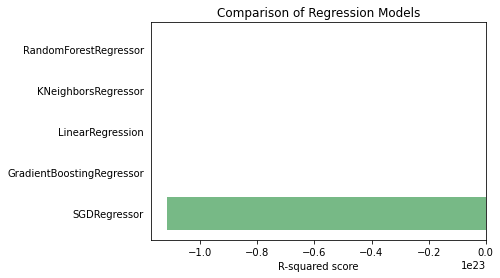

In [83]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('images/compare_models.png', bbox_inches = 'tight')

In [101]:
reg_model = RandomForestRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_test_preds = reg_model.predict(X_test)
r2_not_refined = r2_score(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined)) 

R2 score is: 0.084958


In [102]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    HAD, 
                                                    test_size = .20, 
                                                    random_state = 42)

# Set the parameters by cross-validation
#tuned_parameters = [{'n_estimators': [100, 200, 300],
#                     'max_depth' : [2, 3, 4],
#                     'loss': ['ls', 'lad', 'huber']}]
tuned_parameters = [{'n_estimators': [200, 300],
                     'max_depth' : [3, 4],
                     'loss': ['ls', 'lad']}]

# create and fit a ridge regression model, testing each alpha
reg_model = RandomForestRegressor()  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(X_train, y_train)
reg_model_optimized = grid.best_estimator_

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

ValueError: Invalid parameter loss for estimator RandomForestRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [69]:
newdf=df.drop(['ICD10 code','Stay','Insurance','Discharge Doctor','Gross Bill Amount','Addmission Time',
              'Discharge Time','ICD10 code.1','diagnosis name'],axis=1)